In [1]:
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

from keras.optimizers import Adam, RMSprop

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics

In [2]:
from keras.layers.regularization.dropout import Dropout
from keras.backend import dropout
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Завантаження набору даних Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Створення моделі 
model = Sequential([
    Conv2D(64, (5, 5), padding="same",
					activation="relu",
					input_shape=(28, 28, 1)),

    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (5, 5), padding="same",
					activation="relu"),

    MaxPooling2D(pool_size=(2, 2)),
	  Conv2D(256, (5, 5), padding="same",
					activation="relu"),
	
	  MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu', name = 'hidden_1'),
		Dropout(0.5),

    Dense(10, activation='softmax', name = 'output')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Навчання моделі
history = model.fit(
	x_train.astype(np.float32), y_train.astype(np.float32),
	epochs=22,
	steps_per_epoch=70,
	validation_split=0.33
)


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/22
70/70 [==============================] - 23s 102ms/step - loss: 2.3372 - sparse_categorical_accuracy: 0.6705 - val_loss: 0.4169 - val_sparse_categorical_accuracy: 0.8501
Epoch 2/22
70/70 [==============================] - 6s 90ms/step - loss: 0.4155 - sparse_categorical_accuracy: 0.8526 - val_loss: 0.3392 - val_sparse_categorical_accuracy: 0.8762
Epoch 3/22
70/70 [==============================] - 6s 88ms/step - loss: 0.3426 - sparse_categorical_accuracy: 0.8789 - val_loss: 0.2949 - val_sparse_categorical_accuracy: 0.8937
Epoch 4/22
70/70 [==============================] - 6s 88ms/step - loss: 0.3049 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.2735 - val_sparse_categorical_accuracy: 0.9005
Epoch 5/22
70/70 [==============================] - 6s 86ms/step - loss: 0.2691 - sparse_categorical_accuracy: 0.9018 - val_loss: 0.2593 - val_sparse_categorical_accuracy: 0.9046
Epoch 6/22
70/70 [======================

In [3]:
# Оцінка моделі на тестових даних 
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3536 - sparse_categorical_accuracy: 0.9127
Test accuracy: 0.9126999974250793


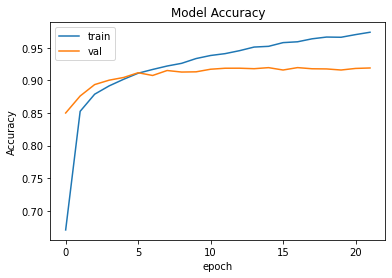

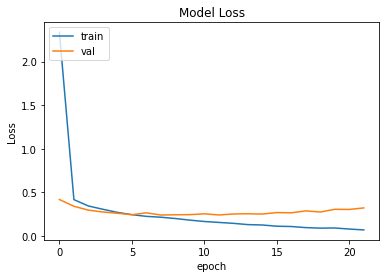

In [4]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
model.save_weights('./model.h5', overwrite=True)

In [6]:
model.save("my_model_2")